In [158]:
import sys
sys.path.append('/g/data1a/e14/as3189/OFAM/scripts/')
import gsw
import numpy as np
import xarray as xr
from pathlib import Path
from scipy import interpolate
import matplotlib.pyplot as plt
from main import paths, idx_1d, LAT_DEG, lx
from matplotlib.colors import LinearSegmentedColormap
# Path to save figures, save data and OFAM model output.
fpath, dpath, xpath, lpath = paths()
tpath = Path('/g', 'data', 'e14', 'as3189', 'OFAM', 'TAU')

In [297]:
# dU = xr.open_dataset('/g/data/e14/as3189/OFAM/TAU/adcp0n165e_mon.cdf').sel(lat=0, lon=165, depth=slice(10, 355))
dU = xr.open_dataset('/g/data/e14/as3189/OFAM/TAU/adcp0n165e_dy.cdf').sel(lat=0, lon=165, depth=slice(10, 355))
# print(dU.u_1205)
du = dU.where(dU['u_1205'] != dU.missing_value)
du_dropped = dU.where(duu['u_1205'] != dU.missing_value, drop=True)
print(du.u_1205)
print(du_dropped.depth)

<xarray.DataArray 'u_1205' (time: 6195, depth: 70)>
array([[10.2, 12.6, 15. , ...,  nan,  nan,  nan],
       [ 8.3,  9.9, 11.6, ...,  nan,  nan,  nan],
       [ 2.7,  4.5,  6.3, ...,  nan,  nan,  nan],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1991-03-30T12:00:00 ... 2008-03-14T12:00:00
  * depth    (depth) float32 10.0 15.0 20.0 25.0 ... 340.0 345.0 350.0 355.0
    lat      float32 0.0
    lon      float32 165.0
Attributes:
    name:            u
    long_name:       Eastward Velocity
    generic_name:    u
    FORTRAN_format:   
    units:           cm/s
    epic_code:       1205
<xarray.DataArray 'depth' (depth: 70)>
array([ 10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,  65.,
        70.,  75.,  80.,  85.,  90.,  95., 100., 105., 110., 115., 120., 125.,
       130., 135., 140., 145.,

In [279]:
def plot_tao(z, t, u, name, save_name):
    # basic_cols = ['red', 'white', 'blue']
    # my_cmap = LinearSegmentedColormap.from_list('mycmap', basic_cols)
    cmap = plt.cm.seismic
    cmap.set_bad('lightgrey') 
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_title(name, loc='left')
    im = ax.pcolormesh(t, z, u, cmap=cmap, vmax=120, vmin=-120)
    ax.set_ylim(355, 10)
    plt.colorbar(im, shrink=0.8)

    plt.savefig(fpath.joinpath(save_name))
    plt.show()

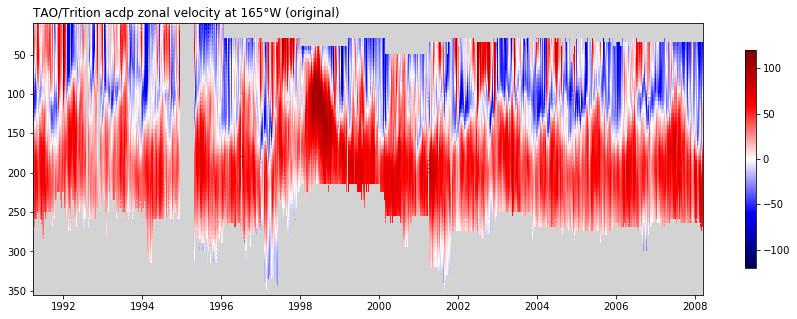

In [280]:
name = 'TAO/Trition acdp zonal velocity at 165°W (original)'
save_name = 'tao_165w_original.png'
z = du.depth
t = du.time
u = du.u_1205.transpose('depth', 'time')
plot_tao(z, t, u, name, save_name)

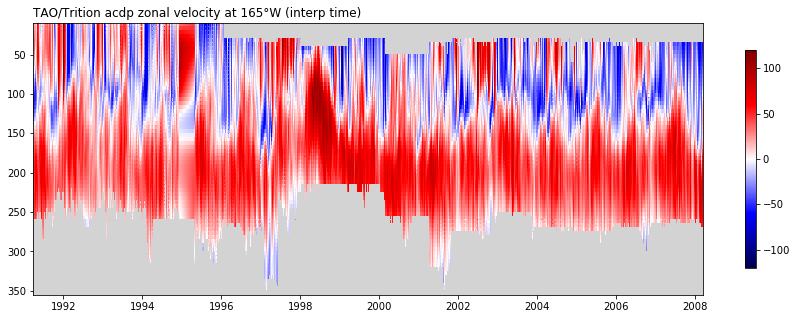

In [281]:
du_int = du_dropped.interp(time=du.time, method='linear')
name = 'TAO/Trition acdp zonal velocity at 165°W (interp time)'
save_name = 'tao_165w_time_interp.png'
z = du.depth
t = du.time
u = du_int.u_1205.transpose('depth', 'time')
plot_tao(z, t, u, name, save_name)

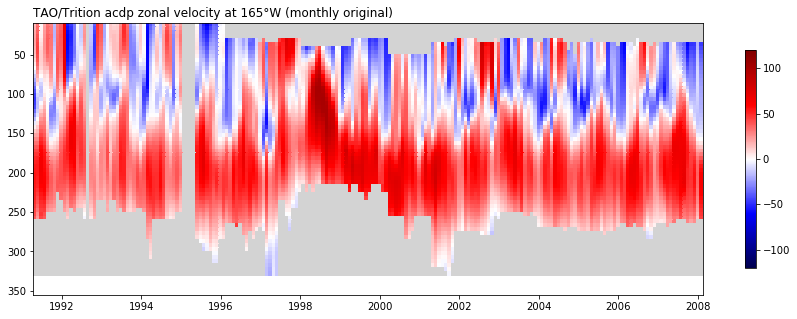

In [288]:
name = 'TAO/Trition acdp zonal velocity at 165°W (monthly original)'
save_name = 'tao_165w_original_mon.png'
z = du.depth
t = du.time
u = du.u_1205.transpose('depth', 'time')
plot_tao(z, t, u, name, save_name)

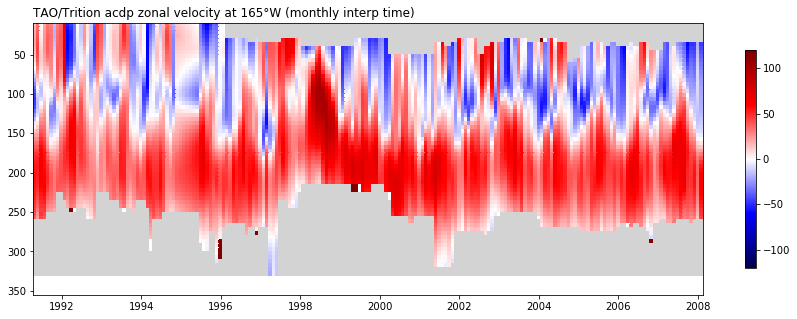

In [289]:
du_int = du_dropped.interp(time=du.time, method='linear')
name = 'TAO/Trition acdp zonal velocity at 165°W (monthly interp time)'
save_name = 'tao_165w_time_interp_mon.png'
z = du.depth
t = du.time
u = du_int.u_1205.transpose('depth', 'time')
plot_tao(z, t, u, name, save_name)

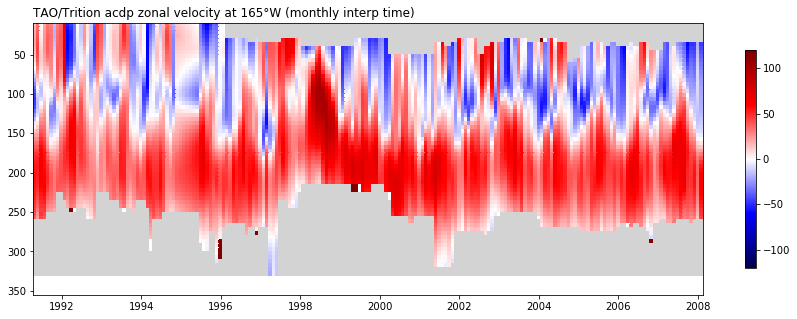

In [290]:
du_intx = du_int.interp(method='linear')
name = 'TAO/Trition acdp zonal velocity at 165°W (monthly interp time)'
save_name = 'tao_165w_time_interp_mon.png'
z = du.depth
t = du.time
u = du_intx.u_1205.transpose('depth', 'time')
plot_tao(z, t, u, name, save_name)

In [298]:
t = du.depth.values
z = np.arange(len(du.time))
du.u_1205[:, -1] = -10
for i in range(len(du.u_1205[:, 0])):
    if np.isnan(du.u_1205[i, 0]):
        du.u_1205[i, 0] = 0 
u = du.u_1205.values

u_mask = np.ma.masked_invalid(u)
tt, zz = np.meshgrid(t, z)
t1 = tt[~u_mask.mask]
z1 = zz[~u_mask.mask]
u_masked = u_mask[~u_mask.mask]
g = interpolate.griddata((t1, z1), u_masked.ravel(),
                          (tt, zz),
                             method='nearest')
gl = interpolate.griddata((t1, z1), u_masked.ravel(),
                          (tt, zz),
                             method='linear')
gc = interpolate.griddata((t1, z1), u_masked.ravel(),
                          (tt, zz),
                             method='cubic')
print(g.shape, u.shape)

(6195, 70) (6195, 70)


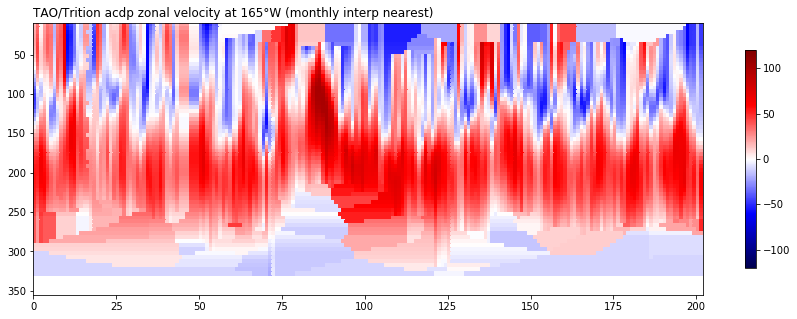

In [292]:
name = 'TAO/Trition acdp zonal velocity at 165°W (monthly interp nearest)'
save_name = 'tao_165w_interp_mon_near.png'
plot_tao(t, z, np.transpose(g), name, save_name)

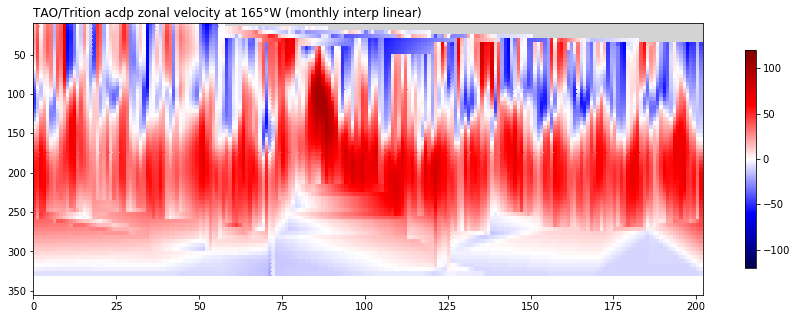

In [293]:
name = 'TAO/Trition acdp zonal velocity at 165°W (monthly interp linear)'
save_name = 'tao_165w_interp_mon_linear.png'
plot_tao(t, z, np.transpose(gl), name, save_name)

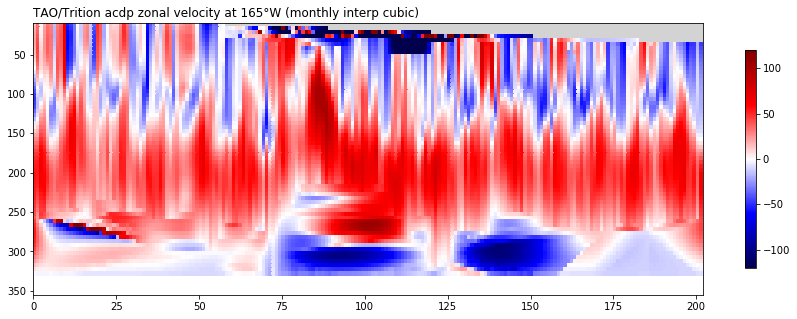

In [294]:
name = 'TAO/Trition acdp zonal velocity at 165°W (monthly interp cubic)'
save_name = 'tao_165w_interp_mon_cubic.png'
plot_tao(t, z, np.transpose(gc), name, save_name)

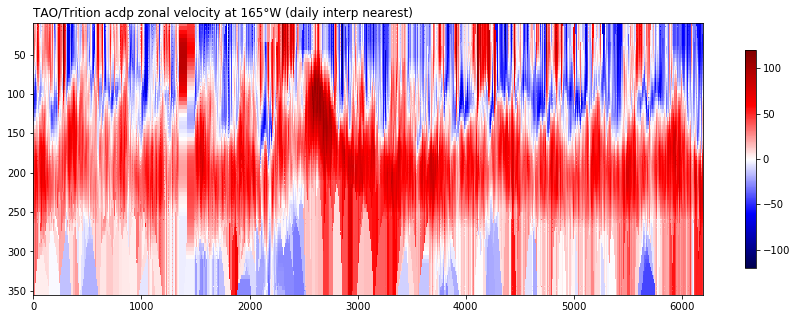

In [283]:
name = 'TAO/Trition acdp zonal velocity at 165°W (daily interp nearest)'
save_name = 'tao_165w_interp_day_near.png'
plot_tao(t, z, np.transpose(g), name, save_name)

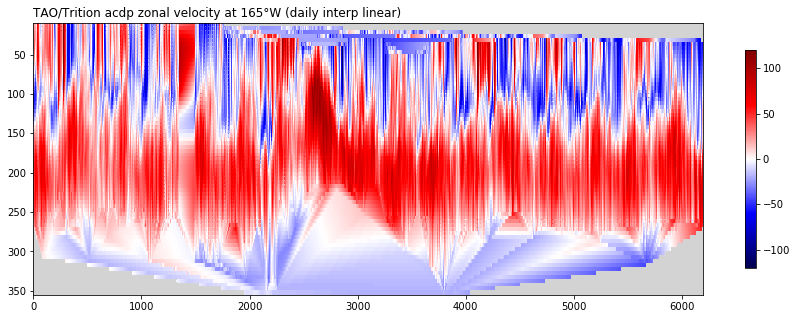

In [284]:
name = 'TAO/Trition acdp zonal velocity at 165°W (daily interp linear)'
save_name = 'tao_165w_interp_day_linear.png'
plot_tao(t, z, np.transpose(gl), name, save_name)

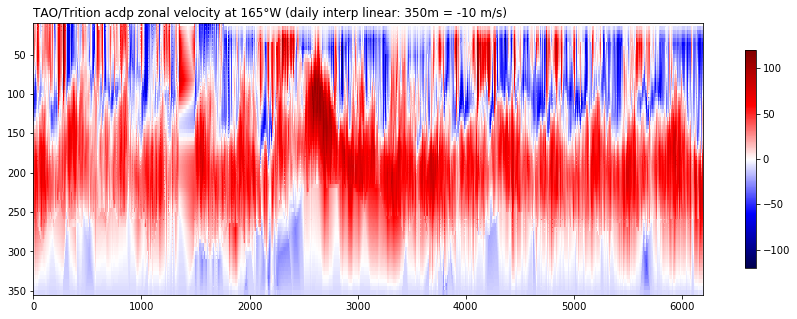

In [299]:
name = 'TAO/Trition acdp zonal velocity at 165°W (daily interp linear: 350m = -10 m/s)'
save_name = 'tao_165w_interp_day_linear_-10.png'
plot_tao(t, z, np.transpose(gl), name, save_name)

In [ ]:
df.u_1205.sel(depth=50).interp(time=df.time, method='linear',kwargs={'fill_value': 1e35}).plot()

In [6]:
du = df.where(df.u_1205 != df._FillValue, drop=True).u_1205

In [ ]:
tmp = du.sel(depth=50).interp(time=df.time, method='linear')
# du.sel(depth=50).plot()

In [ ]:
du.time
tmp.time

In [ ]:
df.time

In [ ]:
tmp.plot()

In [ ]:
df.u_1205.sel(depth=50).plot()

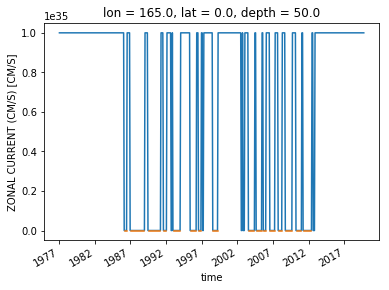

In [74]:
dc.U_320.sel(depth=50, lat=0, lon=165).plot()
dc_dropped = dc.where(dc.U_320 != dc._FillValue).U_320
dc_int = dc.sel(depth=50,lat=0, lon=165).interp(time=dc.time, method='linear')
dc_int.plot()
# du.sel(depth=50).plot()

In [ ]:
dc_int.plot()

In [ ]:
dc.time[81]

In [ ]:
dc.sel(lon=165, depth=10).U_320.plot(vmax=150, vmin=-150)

In [11]:
du_int = du.sel(time=du.time[0], depth=50).interp(lat=np.arange(-2, 2, 0.5), method='splinef2d')

ValueError: splinef2d is not a valid interpolator

In [55]:
z = dy.sel(lat=0, lon=165).u_1205.values
depth = dy.depth.values
time = np.arange(0, 203)
dx = interpolate.interp2d(depth, time, z, kind='linear', copy=True)

In [56]:
s = dx(depth, time)

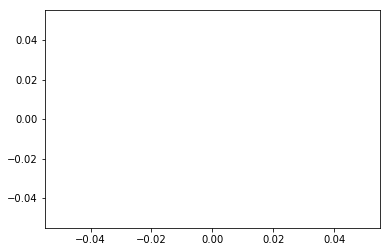

In [61]:
plt.plot(s[:, 20])

In [45]:
Depth = np.arange(0, 425, 5)
Lon = np.array([147, 156, 165, 190, 220, 235, 250])
Lat = [0, 8]
nlon = 7
nlat = 2
ndep = 84
ntim = 381
Depth_Index = np.arange(6, 60, 2)
Depths = Depth[Depth_Index]

array([ 10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,
        65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105., 110., 115.,
       120., 125., 130., 135., 140., 145., 150., 155., 160., 165., 170.,
       175., 180., 185., 190., 195., 200., 205., 210., 215., 220., 225.,
       230., 235., 240., 245., 250., 255., 260., 265., 270., 275., 280.,
       285., 290., 295., 300., 305., 310., 315., 320., 325., 330., 335.,
       340., 345., 350., 355.])